In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

In [3]:
df_unrate = pd.read_csv('UNRATE.csv')
df_crude = pd.read_csv('SPDYNCBRTINUSA.csv')
df_crude.rename ({'SPDYNCBRTINUSA' : 'Crude_birth'} , axis = 1, inplace = True)
print(df_crude.head())
df_unrate.head()
print(df_unrate.shape)


         DATE  Crude_birth
0  1960-01-01         23.7
1  1961-01-01         23.3
2  1962-01-01         22.4
3  1963-01-01         21.7
4  1964-01-01         21.1
(920, 2)


In [4]:
df = pd.merge(df_crude, df_unrate, how = "left", on = "DATE")
df.head()

,DATE,Crude_birth,UNRATE
0,1960-01-01,23.7,5.2
1,1961-01-01,23.3,6.6
2,1962-01-01,22.4,5.8
3,1963-01-01,21.7,5.7
4,1964-01-01,21.1,5.6


In [ ]:
df.isnull().sum()

DATE           0
Crude_birth    0
UNRATE         0
dtype: int64

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])

Text(0.5, 1.0, 'Crude Birth Rate Over Time')

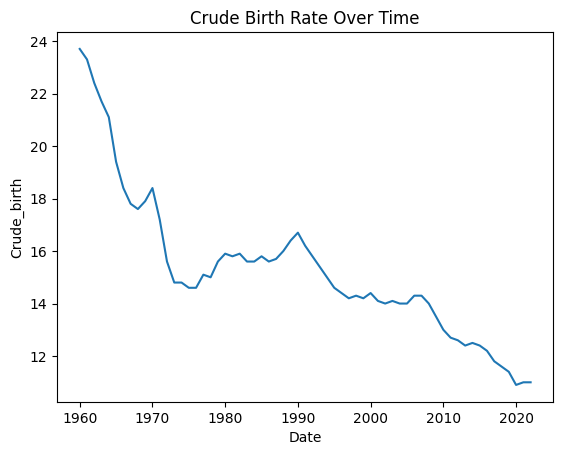

In [14]:
plt.plot(df['DATE'], df['Crude_birth'])
plt.xlabel("Date")
plt.ylabel("Crude_birth")
plt.title("Crude Birth Rate Over Time")

(array([-3.1       ,  4.47777778, 12.05555556, 19.63333333, 27.21111111,
        34.78888889, 42.36666667, 49.94444444, 57.52222222, 65.1       ]),
 [Text(-3.1, 0, ''),
  Text(4.477777777777776, 0, '1964-01-01'),
  Text(12.055555555555554, 0, '1972-01-01'),
  Text(19.63333333333333, 0, '1980-01-01'),
  Text(27.211111111111105, 0, '1987-01-01'),
  Text(34.788888888888884, 0, '1995-01-01'),
  Text(42.36666666666666, 0, '2002-01-01'),
  Text(49.944444444444436, 0, '2010-01-01'),
  Text(57.52222222222221, 0, '2018-01-01'),
  Text(65.1, 0, '')])

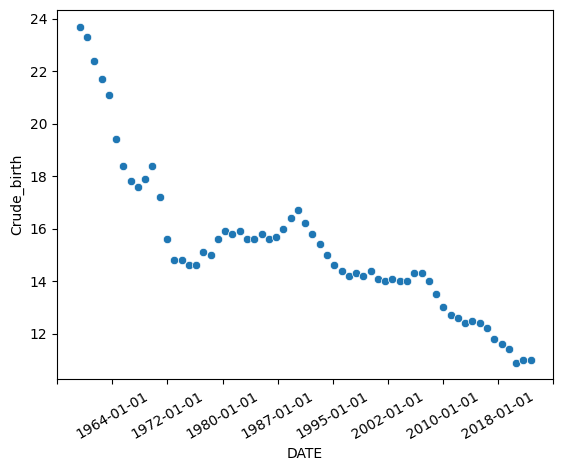

In [18]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
plot = sb.scatterplot(data = df_crude, x = "DATE", y = "Crude_birth")
plot.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.xticks(rotation = 30)

Text(0.5, 1.0, 'Unemployment Rate Over Time')

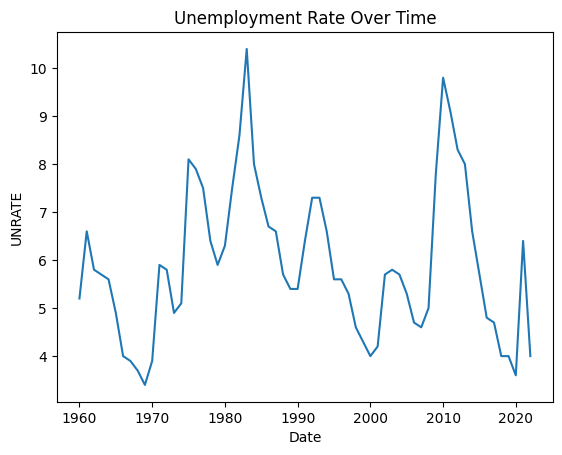

In [19]:
plt.plot(df['DATE'], df['UNRATE'])
plt.xlabel("Date")
plt.ylabel("UNRATE")
plt.title("Unemployment Rate Over Time")

Text(0.5, 1.0, 'Effects of crude birth rate on the unemployment rate')

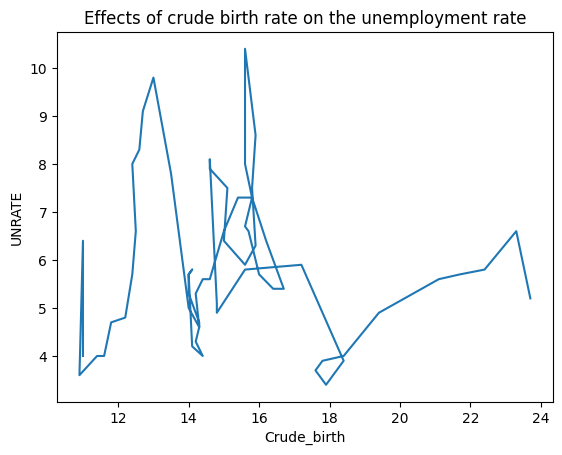

In [20]:
plt.plot(df['Crude_birth'], df['UNRATE'])
plt.xlabel("Crude_birth")
plt.ylabel("UNRATE")
plt.title("Effects of crude birth rate on the unemployment rate")

<Axes: xlabel='Crude_birth', ylabel='UNRATE'>

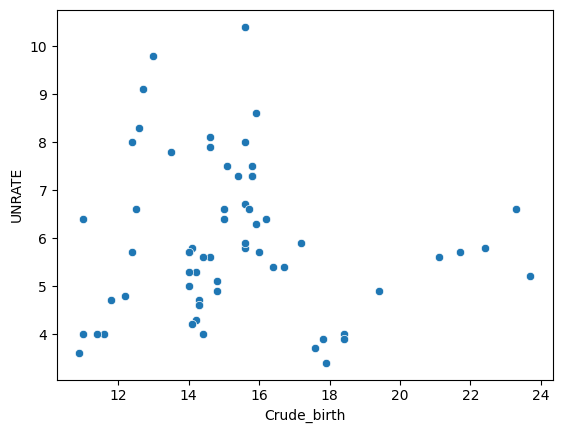

In [22]:
sb.scatterplot(data = df, x = "Crude_birth", y = "UNRATE")


In [42]:
crude_mean= df["Crude_birth"].mean()
df["Crude_SD"] = (((df['Crude_birth']-crude_mean)**2).mean())**(1/2)
df["Crude_Z"] = (df["Crude_birth"]-crude_mean)/(df["Crude_SD"])
print(df.tail())

         DATE  Crude_birth  UNRATE  Crude_SD   Crude_Z
58 2018-01-01         11.6     4.0    2.8095 -1.319220
59 2019-01-01         11.4     4.0    2.8095 -1.390407
60 2020-01-01         10.9     3.6    2.8095 -1.568375
61 2021-01-01         11.0     6.4    2.8095 -1.532781
62 2022-01-01         11.0     4.0    2.8095 -1.532781


<Axes: xlabel='DATE', ylabel='Crude_Z'>

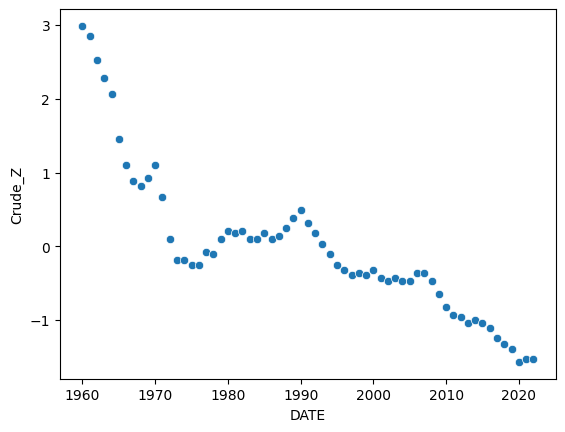

In [47]:
sb.scatterplot(data = df, x = "DATE", y = "Crude_Z")